In [22]:
from src.Juego import JuegoCartas
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vemos como el siguiente ejemplo de código verifica que funciona el programa:

In [5]:
cartas = [0, 1, 2, 3, 4, 5]
juego = JuegoCartas(cartas)
print(juego)

Jugador 1: 
Cartas elegidas: 5,3,1
Puntos sumados: 9

Jugador 2: 
Cartas elegidas: 0,2,4
Puntos sumados: 6


Generaremos diferentes casos y veremos la cantidad de iteraciones de los loops (operaciones no constantes) en función del tamaño del input.

In [38]:
simular = lambda n: JuegoCartas([randint(0,100) for _ in range(n)]).iteraciones

In [39]:
iteraciones = [2**e for e in range(0,13)]
data = []
for i in iteraciones:
    its = simular(i)
    data.append((i, its))
    print(f"n = {i} ⇒ n^2 = {i**2}, doble de las iteraciones = {its * 2}, iteraciones = {its}")

n = 1 ⇒ n^2 = 1, doble de las iteraciones = 2, iteraciones = 1
n = 2 ⇒ n^2 = 4, doble de las iteraciones = 6, iteraciones = 3
n = 4 ⇒ n^2 = 16, doble de las iteraciones = 22, iteraciones = 11
n = 8 ⇒ n^2 = 64, doble de las iteraciones = 78, iteraciones = 39
n = 16 ⇒ n^2 = 256, doble de las iteraciones = 286, iteraciones = 143
n = 32 ⇒ n^2 = 1024, doble de las iteraciones = 1086, iteraciones = 543
n = 64 ⇒ n^2 = 4096, doble de las iteraciones = 4222, iteraciones = 2111
n = 128 ⇒ n^2 = 16384, doble de las iteraciones = 16638, iteraciones = 8319
n = 256 ⇒ n^2 = 65536, doble de las iteraciones = 66046, iteraciones = 33023
n = 512 ⇒ n^2 = 262144, doble de las iteraciones = 263166, iteraciones = 131583
n = 1024 ⇒ n^2 = 1048576, doble de las iteraciones = 1050622, iteraciones = 525311
n = 2048 ⇒ n^2 = 4194304, doble de las iteraciones = 4198398, iteraciones = 2099199
n = 4096 ⇒ n^2 = 16777216, doble de las iteraciones = 16785406, iteraciones = 8392703


La mitad de la cantidad de iteraciones esperadas aproximan muy bien a la complejidad teórica. Vemos como el crecimiento es efectivamente cuadrático y aproxima el cuadrado del tamaño del input.
<div align="right">□</div>

In [40]:
df = pd.DataFrame({"i": [x[0] for x in data],\
                   "lineal": [x[0] for x in data],\
                   "iteraciones": [x[1] for x in data]})
df = df.set_index('i')
df

,lineal,iteraciones
i,,
1,1,1
2,2,3
4,4,11
8,8,39
16,16,143
32,32,543
64,64,2111
128,128,8319
256,256,33023


Text(0, 0.5, 'Millones de iteraciones que se realizan.')

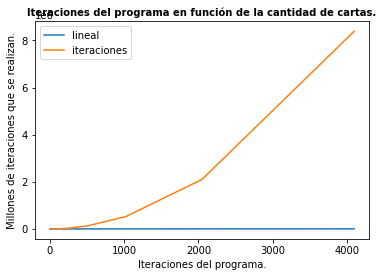

In [41]:
df.plot()
plt.title("Iteraciones del programa en función de la cantidad de cartas.", fontsize=10, fontweight = "bold")
plt.xlabel("Iteraciones del programa.", fontsize=10)
plt.ylabel("Millones de iteraciones que se realizan.", fontsize=10)

A priori este gráfico no parece representar el crecimiento de una función lineal versus el crecimiento de una cuadrática. La lineal parece constante y la cuadrática (casi) lineal. Esto es una distorsión visual producto de la escala del eje y.

Con eso en cuenta, vemos como la curva aproxima el crecimiento (y por ende forma) de una polinómica de grado dos.